In [71]:
import pandas as pd


In [72]:

bomba_data = pd.read_csv('../data/processed/Data.csv')


In [73]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler

In [74]:
bomba_data.head().T

,0,1,2,3,4
Unnamed: 0,0.00,1.0,2.00,3.0,4.0
Basal Rate (U/h),1.95,1.6,1.95,2.7,2.2
BWZ Estimate (U),9.50,6.6,5.50,4.4,11.2
BWZ Carb Ratio (U/Ex),1.00,1.9,1.00,1.1,1.5
BWZ Insulin Sensitivity (mg/dL/U),45.00,45.0,45.00,45.0,45.0
BWZ Carb Input (exchanges),9.50,3.5,5.50,4.0,7.5
BWZ BG Input (mg/dL),84.00,111.0,99.00,97.0,75.0
BWZ Correction Estimate (U),0.00,0.0,0.00,0.0,0.0
BWZ Food Estimate (U),9.50,6.6,5.50,4.4,11.2
BWZ Active Insulin (U),0.00,0.0,0.00,1.2,0.0


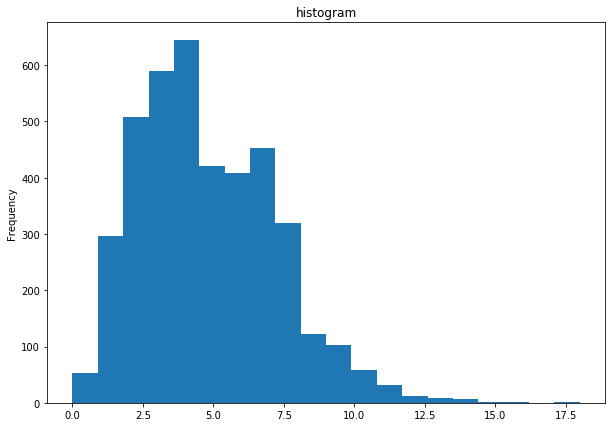

In [75]:
bomba_data['BWZ Estimate (U)'].plot(kind='hist', bins=20, title='histogram', figsize=(10, 7));

In [76]:
bomba_data.columns.tolist()

['Unnamed: 0',
 'Basal Rate (U/h)',
 'BWZ Estimate (U)',
 'BWZ Carb Ratio (U/Ex)',
 'BWZ Insulin Sensitivity (mg/dL/U)',
 'BWZ Carb Input (exchanges)',
 'BWZ BG Input (mg/dL)',
 'BWZ Correction Estimate (U)',
 'BWZ Food Estimate (U)',
 'BWZ Active Insulin (U)',
 'BWZ Unabsorbed Insulin Total (U)',
 'day_of_month',
 'day_of_week',
 'month_of_year',
 'hour']

In [77]:
# Food estimate lo quitamos de la lista por correlación = 1 con BWZ Estimate (U)

NUM_FEATS = ['Basal Rate (U/h)','BWZ Carb Ratio (U/Ex)','BWZ Insulin Sensitivity (mg/dL/U)',
             'BWZ Carb Input (exchanges)', 'BWZ BG Input (mg/dL)','BWZ Correction Estimate (U)',
             'BWZ Active Insulin (U)','BWZ Unabsorbed Insulin Total (U)']
CAT_FEATS = ['day_of_month', 'day_of_week', 'month_of_year', 'hour']
FEATS = NUM_FEATS + CAT_FEATS
TARGET = 'BWZ Estimate (U)'
FEATS


['Basal Rate (U/h)',
 'BWZ Carb Ratio (U/Ex)',
 'BWZ Insulin Sensitivity (mg/dL/U)',
 'BWZ Carb Input (exchanges)',
 'BWZ BG Input (mg/dL)',
 'BWZ Correction Estimate (U)',
 'BWZ Active Insulin (U)',
 'BWZ Unabsorbed Insulin Total (U)',
 'day_of_month',
 'day_of_week',
 'month_of_year',
 'hour']

In [78]:
numeric_transformer = \
Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), 
                ('scaler', StandardScaler())])

In [79]:
# Defino el Pipelinte de las columnas categóricas

categorical_transformer = \
Pipeline(steps=[('imputer', SimpleImputer(strategy='constant',fill_value=-999999)),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])
categorical_transformer

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True,
                               fill_value=-999999, missing_values=nan,
                               strategy='constant', verbose=0)),
                ('onehot',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', sparse=True))],
         verbose=False)

In [80]:
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, NUM_FEATS),
                                              ('cat', categorical_transformer, CAT_FEATS)])


In [81]:
pd.DataFrame(data=preprocessor.fit_transform(bomba_data)).head()

,0
0,"(0, 0)\t3.8702534495637124\n (0, 1)\t0.6972..."
1,"(0, 0)\t2.599456167744954\n (0, 1)\t5.73670..."
2,"(0, 0)\t3.8702534495637124\n (0, 1)\t0.6972..."
3,"(0, 0)\t6.5933904820324845\n (0, 1)\t1.2571..."
4,"(0, 0)\t4.777965793719971\n (0, 1)\t3.49694..."


In [82]:
preprocessor

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='median',
                                                                verbose=0)),
                                                 ('scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                           

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
# Se definen X_train, X_test, y_train, y_test a partir de bomba_data.
X_train, X_test, y_train, y_test = train_test_split(bomba_data[FEATS], bomba_data[TARGET], test_size=0.2) 


In [85]:
# Verifico las dimensiones de X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3230, 12)
(808, 12)
(3230,)
(808,)


In [86]:
# Cargo el modelo a utilizar
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression



In [87]:
# Defino el modelo y los pasos (steps) a utilizar en el Pipeline

model= Pipeline(steps=[('preprocessor', preprocessor),
                       ('regressor', LinearRegression())])

In [88]:
# Entreno el modelo
model.fit(X_train, y_train);



# 5. Check model performance on test and train data

In [89]:
# Se importan las metricas para evaluar el error cometido

from sklearn.metrics import mean_squared_error, r2_score

In [90]:
# Defino los datos sobre los que se va a predecir en el modelo X_train y X_test
# Nota: En el Pipeline de categorical_transformer hay que poner fill_value=-999999 
# para que no de un error de falta de datos en alguna celda debido a la transformación

y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

In [92]:
#Error sobre train y sobre test

print(f"train error: {mean_squared_error(y_pred=y_predict_train, y_true=y_train, squared=False)}")
print(f"test error: {mean_squared_error(y_pred=y_predict_test, y_true=y_test, squared=False)}")

train error: 0.3583690389040205
test error: 0.4404279876998674


In [94]:
# Calculo del error metrica r2_score

print(f' test train: {r2_score(y_true=y_train, y_pred=y_predict_train)}')
print(f' test error: {r2_score(y_true=y_test, y_pred=y_predict_test)}')

 test train: 0.9775668931877677
 test error: 0.9676073293375219


# 6. Check model performance using cross validation


In [95]:
from sklearn.model_selection import cross_val_score


In [96]:
scores = cross_val_score(model, 
                         bomba_data[FEATS], 
                         bomba_data[TARGET], 
                         scoring='neg_root_mean_squared_error', 
                         cv=16, n_jobs=-1)

In [97]:
import numpy as np
np.mean(-scores)

0.36220242517460977

In [56]:
print(-scores)


[1.04084492 0.29733806 0.27907839 0.30232789 0.27684921 0.18585985
 0.19347841 0.24932384 0.26059667 0.27509019 0.26593614 0.34298995
 0.21970059 0.32348562 0.70128219 0.5810569 ]


# 7. Optimize model using grid search


In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
# Se definen los parametros del grid y del model
# verbose muestra los pasos que ha haciendo el modelo de entrenamiento.
# cv : validación cruzada
# n_jobs = -1 significa que utiliza todos los procesadores para realizar el proceso.
#
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median','most_frequent','constant'],
    #'regressor__n_estimators': [8,16,64,128,256,512],
    #'regressor__max_depth': [4,8,16,32],
    #'regressor__max_features': ['auto', 'sqrt']
}

grid_search = RandomizedSearchCV(model, 
                                 param_grid, 
                                 cv= 20, 
                                 verbose=10, 
                                 scoring='neg_root_mean_squared_error', 
                                 n_jobs=-1,
                                 n_iter=64)

grid_search.fit(bomba_data[FEATS], bomba_data[TARGET])

/home/emilio/miniconda3/envs/test_env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=64. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1002s.) Setting batch_size=2.


Fitting 20 folds for each of 4 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.9s finished


RandomizedSearchCV(cv=20, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocessor',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('num',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('imputer',
                                                                                                SimpleImputer(add_indicator=False,
                                                                                    

In [98]:
# Visualizo los mejores parámetros

grid_search.best_params_

{'preprocessor__num__imputer__strategy': 'mean'}

In [65]:
grid_search.best_score_

-0.35403087088850377

In [99]:
grid_search.best_estimator_.score

<function sklearn.pipeline.Pipeline.score(self, X, y=None, sample_weight=None)>

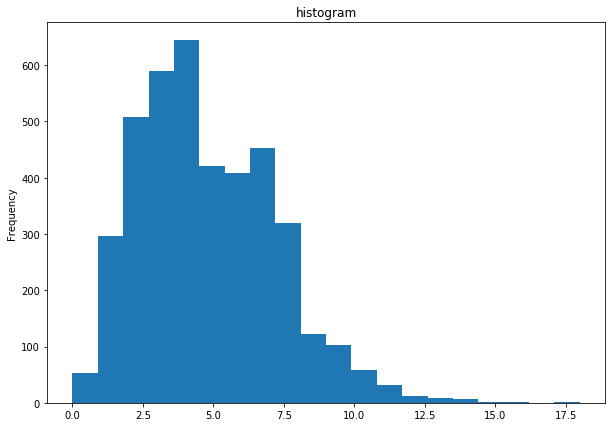

In [100]:
bomba_data[TARGET].plot(kind='hist', bins=20, title='histogram', figsize=(10, 7));

In [101]:
y_test = pd.DataFrame(y_test)
y_test

,BWZ Estimate (U)
3621,3.6
551,4.9
938,3.6
1715,6.0
46,12.0
...,...
2473,7.4
3329,4.0
519,2.4
1668,7.0


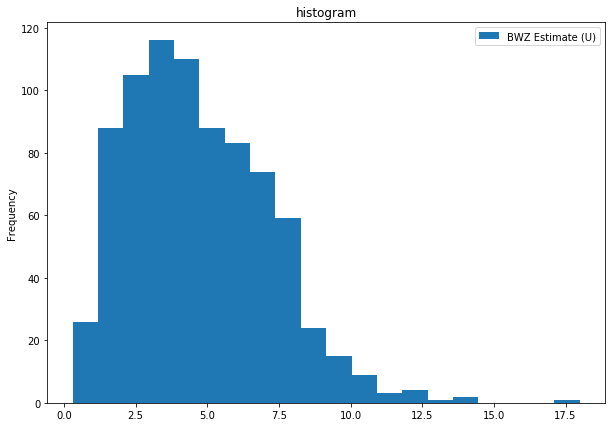

In [102]:
y_test.plot(kind='hist', bins=20, title='histogram', figsize=(10, 7));